In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
import os
import sys
path = os.path.dirname(os.path.realpath("/home/prasoon/Desktop/adspy_shared_utilities.py"))
sys.path.append(path)


In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
fruits = pd.read_table('Desktop/fruit_data_with_colors.txt')

In [4]:
fruits.shape

(59, 7)

In [5]:
x = fruits[['mass','width','height']]
y = fruits['fruit_label']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [6]:
x_train

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0
49,132,5.8,8.7
29,160,7.0,7.4
37,154,7.3,7.3
56,116,5.9,8.1
18,162,7.5,7.1


In [7]:
x_train.shape

(44, 3)

/home/prasoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


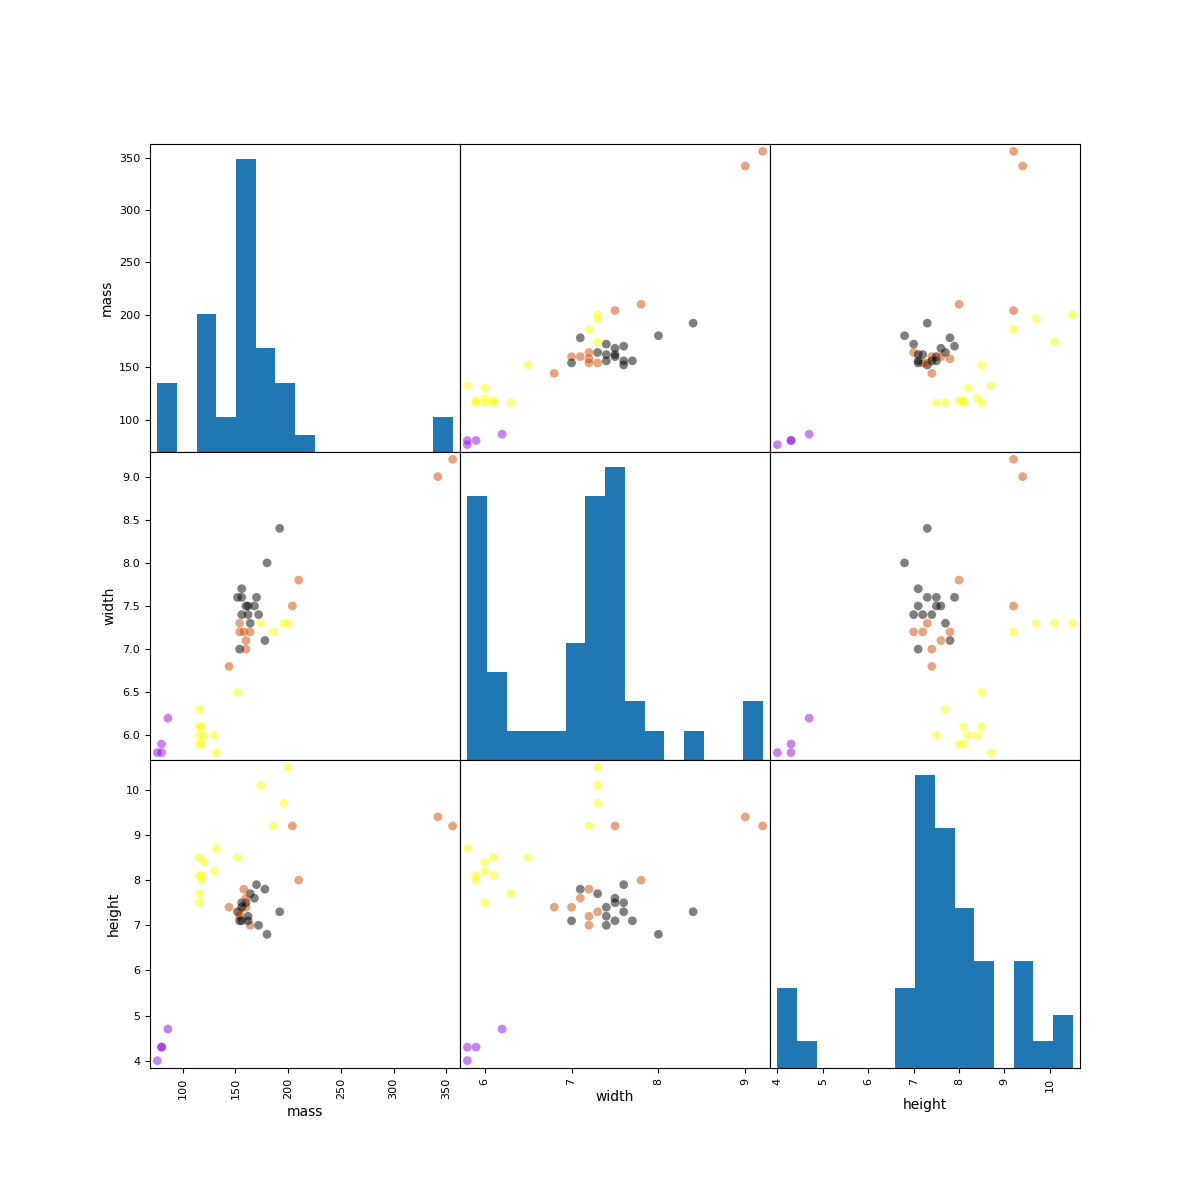

In [8]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x_train,c=y_train,marker='o',s=40,hist_kwds={'bins':15},figsize=(12,12),cmap=cmap)


# Applied Machine Learning,Week 1:A simple classification task

# Import required modules and load data File

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
fruits = pd.read_table('Desktop/fruit_data_with_colors.txt')

In [10]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [11]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name
## Defining a Dictionary that takes numeric fruit label as the input key and returns a value that is a string 
## with the name of the fruit.This dictionary makes it easier to  convert output into a string

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Create train-test split

In [12]:
X = fruits[['mass','width','height']]
y = fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# Create classifier object

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
##create an instance of classifier object(in this case a knn classifier)
knn = KNeighborsClassifier(n_neighbors = 5)


# Train the classifier (fit the estimator) using training data

In [14]:
knn.fit(X_train,y_train)##We then train the classifier by passing in training set data in x_train and the labels in y_train to the clasifier_fit method
#knn classifier in this case is an example of a more general class called an estimator in scikilearn.All estimators
##all estimators have a fit method that takes the training data and then changes the state of the classifier or estimator object
##to enable prediction once the training is finished.It updates the states of k and n variable which means that in
## the case of k nearest neighbours it will memorize the training set examples in some kind of internal storage 
##for future use.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Estimate the accuracy of the classifier on future data,using the test data set

In [15]:
##We use the score method for the classifier object.This will take the test set points as input and compute the accuracy.
##The accuracy is defined as the fraction of test set items,whose true label was predicted by the classifier 

knn.score(X_test,y_test)

0.53333333333333333

# Use the trained k-NN classifier model to classify new,previously unseen objects

In [16]:
##We take individual instances of the object and assign them a label
fruit_prediction = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [17]:
fruit_prediction = knn.predict([[100,6.3,8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

# Plot the decision boundary of the k-NN Classifier

# How sensitive is k-NN classification accuracy to the choice of 'k' parameter

<IPython.core.display.Javascript object>


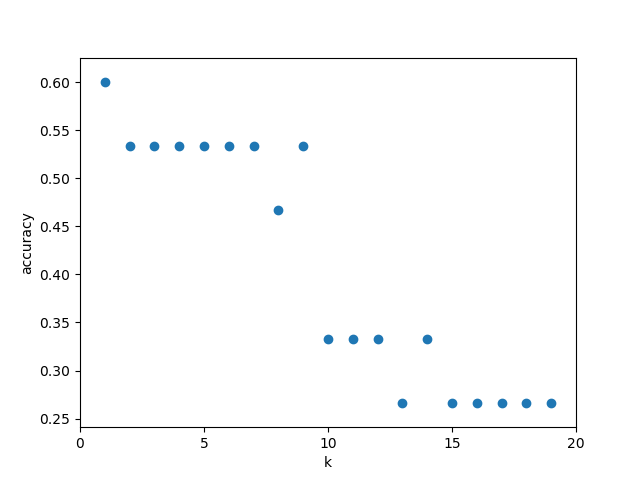

([<matplotlib.axis.XTick at 0x7f5c181480f0>,
 <a list of 5 Text xticklabel objects>)

In [18]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])

# Supervised Learning:Datasets

<IPython.core.display.Javascript object>


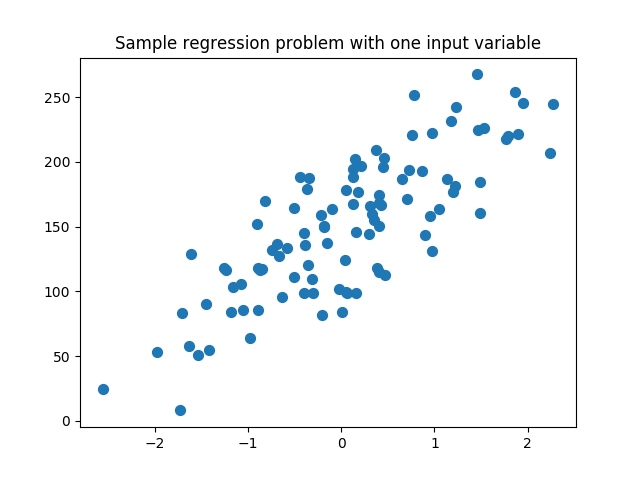

In [19]:
import matplotlib.colors
cmap_bold = matplotlib.colors.ListedColormap(['#FFFF00','#00FF00','#0000FF','#000000'])
fruits = pd.read_table('Desktop/fruit_data_with_colors.txt')
features_names_fruits=['height','width','mass','color_score']
X_fruits=fruits[features_names_fruits]
y_fruits=fruits['fruit_label']
target_names_fruits=['apple','mandarin','orange','lemon']
X_fruits_2d=fruits[['height','width']]
y_fruits_2d=fruits['fruit_label']
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1,y_R1 = make_regression(n_samples=100,n_features=1,n_informative=1,bias=150.0,noise=30.0,random_state=0)
X_R2,y_R2 = make_regression(n_samples=100,n_features=10,n_informative=1,bias=150.0,noise=30.0,random_state=0)
X_R3,y_R3 = make_regression(n_samples=100,n_features=12,n_informative=1,bias=150.0,noise=30.0,random_state=0)
X_R4,y_R4 = make_regression(n_samples=100,n_features=2,n_informative=1,bias=150.0,noise=30.0,random_state=0)
plt.scatter(X_R1,y_R1,marker='o',s=50)
plt.show()


<IPython.core.display.Javascript object>


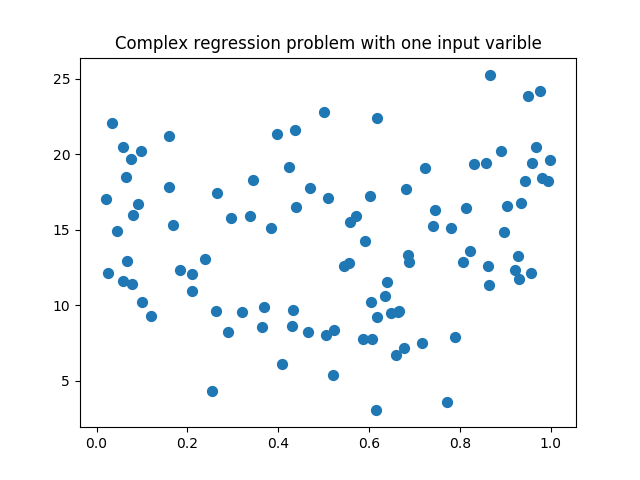

<IPython.core.display.Javascript object>


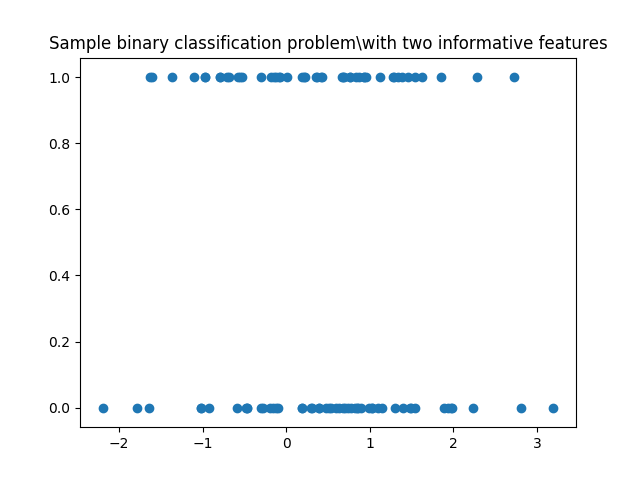

In [20]:
from sklearn.datasets import make_friedman1
from sklearn.datasets import make_classification
plt.figure()
plt.title('Complex regression problem with one input varible')
X_F1,y_F1 = make_friedman1(n_samples = 100,n_features=7,random_state=0)
plt.scatter(X_F1[:,2],y_F1,marker='o',s=50)
plt.show()
plt.figure()
plt.title('Sample binary classification problem\with two informative features')
X_C2,y_C2 = make_classification(n_samples=100,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,flip_y=0.1,class_sep=0.5,random_state=0)
plt.scatter(X_C2[:,1],y_C2)
plt.show()

In [21]:
from sklearn.datasets.samples_generator import make_blobs
X_D2,y_D2=make_blobs(n_samples=100,n_features=2,centers=8,cluster_std=1.3,random_state=4)
y_D2 = y_D2%2
plt.figure()
plt.title('Sample binary classification problem with\non-linearly separable classes')
plt.scatter(X_D2[:,0],X_D2[:,1],c=y_D2,marker='o',s=50,cmap=cmap_bold)
plt.show()
cancer = load_breast_cancer()
(X_cancer,y_cancer) = load_breast_cancer(return_X_y=True)
(X_crime,y_crime)=load_crime_dataset()

<IPython.core.display.Javascript object>

NameError: name 'load_breast_cancer' is not defined

In [22]:
from adspy_shared_utilities import load_crime_dataset

In [23]:
df = pd.read_csv('Desktop/data1.csv')

In [24]:
df.head()

,variable,Minimum,Maximum,Mean,Standard Deviation,Correlation w/ ViolPerPop,Median,Mode,Missing
0,pop,10005.00,7322564.00,53117.984200,204620.252900,0.212354,22792.00,12361.00,0
1,perHoush,1.60,5.28,2.707327,0.334120,-0.020110,2.66,2.60,0
2,pctBlack,0.00,96.67,9.335102,14.247156,0.628368,2.87,0.24,0
3,pctWhite,2.68,99.63,83.979819,16.419080,-0.676849,90.35,98.04,0
4,pctAsian,0.03,57.46,2.670203,4.473843,0.031949,1.23,0.41,0


# Regression

In [25]:
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test,y_train,y_test=train_test_split(X_R1,y_R1,random_state=0)
knnreg=KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test,y_test)))

[ 231.70974697  148.35572605  150.58852659  150.58852659   72.14859259
  166.50590948  141.90634426  235.57098756  208.25897836  102.10462746
  191.31852674  134.50044902  228.32181403  148.35572605  159.16911306
  113.46875166  144.03646012  199.23189853  143.19242433  166.50590948
  231.70974697  208.25897836  128.01545355  123.14247619  141.90634426]
R-squared test score: 0.425


# Regression model complexity as a function of K

<IPython.core.display.Javascript object>


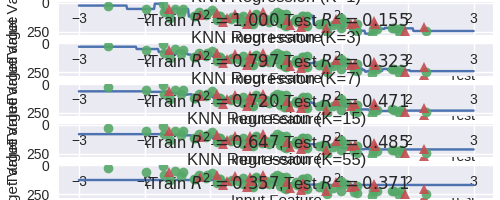

In [26]:
fig,subaxes=plt.subplots(5,1,figsize=(5,2))
X_predict_input = np.linspace(-3,3,500).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X_R1,y_R1,random_state=0)
for thisaxis,K in zip(subaxes,[1,3,7,15,55]):
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train,y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score=knnreg.score(X_train,y_train)
    test_score = knnreg.score(X_test,y_test)
    thisaxis.plot(X_predict_input,y_predict_output)
    thisaxis.plot(X_train,y_train,'o',alpha=0.9,label='Train')
    thisaxis.plot(X_test,y_test,'^',alpha=0.9,label='Test')
    thisaxis.set_xlabel('Input Feature')
    thisaxis.set_ylabel('Target Value')
    thisaxis.set_title('KNN Regression (K={})\n\Train $R^2 = {:.3f}$,Test $R^2 = {:.3f}$'.format(K,train_score,test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1.0)
    
    


# Least-Squares Linear Regression in Scikit-Learn

In [27]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
linreg = LinearRegression().fit(X_train,y_train)
print('linear model intercept (b):{}'.format(linreg.intercept_))
print('linear model coeff (w): {}'.format(linreg.coef_))

linear model intercept (b):148.44575345658873
linear model coeff (w): [ 45.70870465]


In [28]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
linreg = LinearRegression().fit(X_train,y_train)
print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train,y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test,y_test)))


linear model coeff (w): [ 45.70870465]
linear model intercept (b): 148.44575345658873
R-squared score (training): 0.679
R-squared score (test): 0.492


# Plot Linear Regression

<IPython.core.display.Javascript object>


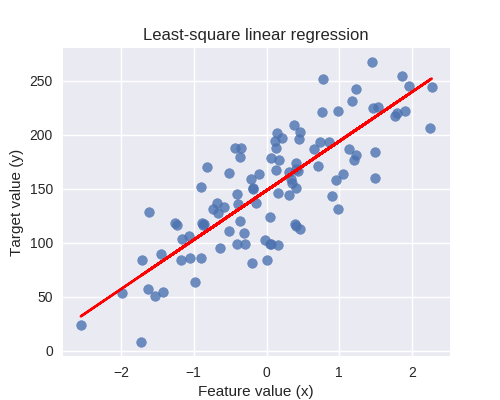

In [29]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1,y_R1,marker='o',s=50,alpha=0.8)
plt.plot(X_R1,linreg.coef_ * X_R1 + linreg.intercept_,'r-')
plt.title('Least-square linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()


# Linear Regression using Ridge model

In [30]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X_R2,y_R2,random_state=0)
linridge = Ridge(alpha=20.0).fit(X_train,y_train)
print('Crime Dataset')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train,y_train)))
print('R-squared score (test){:.3f}'.format(linridge.score(X_test,y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_!=0)))



Crime Dataset
ridge regression linear model intercept: 147.5640302156537
ridge regression linear model coeff:
[  4.54811356  -3.29838458  -4.30843806  65.2080691    2.87035045
   3.77658423  -2.49682566   2.20263284  -2.49056393   0.49973085]
R-squared score (training): 0.873
R-squared score (test)0.794
Number of non-zero features: 10


# Using a Scaler object:fit and transform methods

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = Ridge().fit(X_train_scaled,y_train)
r2_score = clf.score(X_test_scaled,y_test)
##It can be more efficient to do fitting and transforming together on the training set using the fit transform method
scaler = MinMaxScaler()
X_trained_scaled = scaler.fit_transform(X_train)
print(r2_score)

0.789788813252


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X_R2,y_R2,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linridge = Ridge(alpha=2.0).fit(X_train_scaled,y_train)
print('Crime Dataset')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled,y_train)))
print('R-squared score (test){:.3f}'.format(linridge.score(X_test_scaled,y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_!=0)))
#print(X_train)
#print(X_train_scaled)


Crime Dataset
ridge regression linear model intercept: -0.4003382319805553
ridge regression linear model coeff:
[  18.82725243   -4.6789852   -17.22002767  243.03249403    8.42415116
   14.52301765   -6.09314418   15.80585868  -12.76909692   -5.93270176]
R-squared score (training): 0.799
R-squared score (test)0.711
Number of non-zero features: 10


# Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train,X_test,y_train,y_test = train_test_split(X_R2,y_R2,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linlasso = Lasso(alpha=2.0,max_iter=10000).fit(X_train_scaled,y_train)
print('Crime Dataset')
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))
print('Non-zero features: {}'.format(np.sum(linlasso.coef_!=0)))
print('R-Squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled,y_train)))
print('R-Squared score (test): {:.3f}\n'.format(linlasso.score(X_test_scaled,y_test)))
print('Features with non-zero weights (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_R2),linlasso.coef_)),key = lambda e:-abs(e[1])):

SyntaxError: unexpected EOF while parsing (<ipython-input-33-8eb63c4f62b4>, line 15)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
#from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)
X_train,X_test,y_train,y_test=(train_test_split(X_fruits_2d.as_matrix(),y_fruits_2d.as_matrix(),random_state=0))
clf = LogisticRegression(C=100).fit(X_train,y_train)
#plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,'Logistic Regression \ for binary classification\nFruit Dataset:Apple vs others',subaxes)
h=6
w=8
print('A fruit with height {} and width {} is predicted to be: {}'.format(h,w,['not an apple','an apple'][clf.predict([[h,w]])[0]]))
h=10
w=7
print('A fruit with height {} and width {} is predicted to be: {}'.format(h,w,['not an apple','an apple'][clf.predict([[h,w]])[0]]))
#subaxes.set_xlabel('height')
#subaxes.set_ylabel('width')
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf.score(X_test,y_test)))



IndexError: list index out of range

# Linear Classifiers:Support Vector Machines

In [35]:
from sklearn.svm import SVC
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)
X_train,X_test,y_train,y_test = train_test_split(X_R2,y_R2,random_state=0)
fig,subaxes=plt.subplots(1,1,figsize=(7,5))
this_C = 1.0
clf = SVC(kernel='linear',C=this_C).fit(X_train,y_train)
title = 'Linear SVC,C={:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,title,subaxes)



<IPython.core.display.Javascript object>

ValueError: Unknown label type: 'continuous'

# Application to real world dataset

In [36]:
from sklearn.svm import LinearSVC
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf = LinearSVC(C=5,random_state=0).fit(X_train, y_train)
print('Breast Cancer Dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of Linear Classifier on test set: {:.2f}'.format(clf.score(X_test,y_test)))


Breast Cancer Dataset
Accuracy of Linear SVC classifier on training set: 0.68
Accuracy of Linear Classifier on test set: 0.33


In [37]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)
plot_class_regions_for_the_classifier(SVC().fit(X_train,y_train),X_train,y_train,None,None,'Support Vector Classifier: RBF kernel')
plot_class_regions_for_the_classifier(SVC(kernel='poly',degree=3).fit(X_train,y_train),X_train,y_train,None,None,'Support Vector Classifier: \ Polynomial kernel ,degree = 3')


NameError: name 'plot_class_regions_for_the_classifier' is not defined

# Support Vector Machine with RBF kernel:gamma parameter

In [38]:
from adspy_shared_utilities import plot_class_regions_for_classifier
X_train,X_test,y_train,y_test=train_test_split(X_R2,y_R2,random_state=0)
fig,subaxes = plt.subplots(1,3,figsize=(11,4))
for this_gamma,subplot in zip([0.01,1.0,10.0],subaxes):
    clf = SVC(kernel = 'rbf',gamma=this_gamma).fit(X_train,y_train)
    title='Support Vector Classifier: \n\RBF kernel,gamma={:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,title,subplot)
    plt.tight_layout()
    

<IPython.core.display.Javascript object>

ValueError: Unknown label type: 'continuous'

In [39]:
from sklearn.svm import SVC
from adspy_shared_utilities import (plot_class_regions_for_classifier)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_R2,y_R2,random_state=0)
fig,subaxes = plt.subplots(1,3,figsize=(11,4))
for this_gamma,this_axis in zip([0.01,1.0,10.0],subaxes):
    for this_C,subplot in zip([0.1,1,15,250],this_axis):
        title='Support Vector Classifier: \n\RBF kernel,gamma={:.2f},C={:.2f}'.format(this_gamma,this_C)
        clf = SVC(kernel = 'rbf',gamma=this_gamma,C=this_C).fit(X_train,y_train)
        
        plot_class_regions_for_classifier_subplot(clf,X_train,y_train,X_test,y_test,title,subplot)
        plt.tight_layout(pad=0.4,w_pad=0.3,h_pad=1.0)
## imp:always regularize data while using SVM

<IPython.core.display.Javascript object>

TypeError: zip argument #2 must support iteration

# Application of SVM's to real world dataset:unnormalized data

In [40]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)
clf = SVC(C=10).fit(X_train,y_train)
print('Fruits Dataset (unnormalized dataset)')
print('Accuracy of RBF kernel SVC on training set: {:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of RBF kernel SVC on test set: {:.2f}'.format(clf.score(X_test,y_test)))

Fruits Dataset (unnormalized dataset)
Accuracy of RBF kernel SVC on training set: 0.98
Accuracy of RBF kernel SVC on test set: 0.53


# Application of SVMs to real world datasets:normalized data with feature preprocessing with minmax scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf =SVC(C=10).fit(X_train_scaled,y_train)
print('Fruits Dataset (normalized with MinMax scaling) dataset)')
print('Accuracy of RBF kernel SVC on training set: {:.2f}'.format(clf.score(X_train_scaled,y_train)))
print('Accuracy of RBF kernel SVC on test set: {:.2f}'.format(clf.score(X_test_scaled,y_test)))

Fruits Dataset (normalized with MinMax scaling) dataset)
Accuracy of RBF kernel SVC on training set: 0.82
Accuracy of RBF kernel SVC on test set: 0.53


# Cross Validation

# Example based on k-NN Classifier  with fruit dataset (2 features)

In [42]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=5)
X = x.as_matrix()
Y = y.as_matrix()
cv_scores = cross_val_score(clf,X,Y)
print('C')


C


# Decision trees

In [43]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
clf = DecisionTreeClassifier().fit(X_train,y_train)
print('Accuracy of the Decision Tree Classifier on training set :{:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of the Decision Tree Cllassifier on test set : {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy of the Decision Tree Classifier on training set :1.00
Accuracy of the Decision Tree Cllassifier on test set : 0.97


In [44]:
clf = DecisionTreeClassifier(max_depth  = 3).fit(X_train,y_train)
print('Accuracy of the Decision Tree Classifier on training set :{:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of the Decision Tree Cllassifier on test set : {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy of the Decision Tree Classifier on training set :0.98
Accuracy of the Decision Tree Cllassifier on test set : 0.97


# Decision Trees on real world datasets

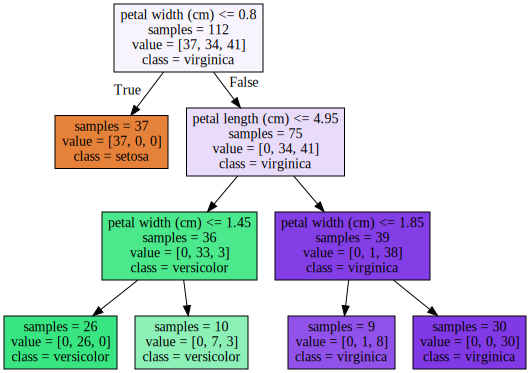

In [49]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances
from sklearn.datasets import load_breast_cancer
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)
clf=DecisionTreeClassifier(max_depth=4,min_samples_leaf=8,random_state=0).fit(X_train,y_train)
plot_decision_tree(clf,iris.feature_names,iris.target_names)